In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
from sshtunnel import SSHTunnelForwarder
from sqlalchemy import create_engine
import arbitrage
import arbitrage_main
import numpy as np
import matplotlib.pyplot as plt

In [5]:
ip = "147.32.83.171"
ssh_tunnel = SSHTunnelForwarder(
        ip,
        ssh_username='syrovzde',
        ssh_private_key='C:\\Users\\zdesi\\.ssh\\syrovzde_rsa',
        remote_bind_address=('localhost', 5432)
    )
ssh_tunnel.start()
engine = create_engine("postgresql://{user}@{host}:{port}/{db}".format(
        host='localhost',
        port=ssh_tunnel.local_bind_port,
        user='syrovzde',
        db='asianodds'
    ))

In [ ]:
#%
#easy arbitrage example


arb = arbitrage.Arbitrage(engine, schemas=[], markets=[], bookmakers=[], moving_odds=False,
                             max_bet=1000)
points = 3
matrix_A = arbitrage_main.create_matrix_a(3.2,3.2,3.2,points)
matrix_A

Two approaches of creating linear program shown in form of table. Both program ran on the easiest for of arbitrage on 1x2 market(odds are home=3.2 draw = 3.2 away = 3.2).

In [ ]:

_, x_w, z_w= arb.solve_maxprofit_gurobi(MatchID=None,matrix_A=matrix_A,weights=np.ones((points+1)**2))
_, x, z= arb.solve_maxprofit_gurobi(MatchID=None,matrix_A=matrix_A,weights=None)

3200.0
3483.6363636363676


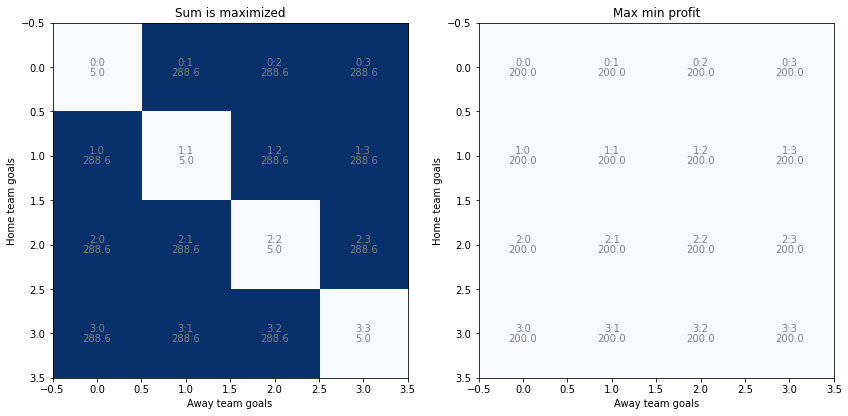

In [77]:
max_min=arbitrage_main.calculate_profit_easy_example(bets=x[:-1],odds=np.array([3.2,3.2,3.2]),points=points)
max_sum=arbitrage_main.calculate_profit_easy_example(bets=x_w,odds=np.array([3.2,3.2,3.2]),points=points)

print(max_min.sum())
print(max_sum.sum())

#plt.figure(figsize=(7, 7))
f,arrs=plt.subplots(1,2,figsize=(14, 14))
#N = np.zeros((points+1,points+1))
N = max_sum
arrs[0].imshow(N, cmap="Blues")
for i in range(points+1):
  for j in range(points+1):
    chstr =  str(i) + ":" + str(j)
    arrs[0].text(j, i, chstr, ha="center", va="bottom", color="gray")
    arrs[0].text(j, i, round(N[i, j].item(),1), ha="center", va="top", color="gray")
#arrs[0].axis("off")
arrs[0].set_xlabel('Away team goals')
arrs[0].set_ylabel('Home team goals')
arrs[0].set_title("Sum is maximized")
N = max_min
arrs[1].imshow(N, cmap="G")
for i in range(points+1):
  for j in range(points+1):
    chstr =  str(i) + ":" + str(j)
    arrs[1].text(j, i, chstr, ha="center", va="bottom", color="gray")
    arrs[1].text(j, i, round(N[i, j].item(),1), ha="center", va="top", color="gray")
arrs[1].set_xlabel('Away team goals')
arrs[1].set_ylabel('Home team goals')
arrs[1].set_title("Max min profit")

#arrs[1].axis("off")
plt.show()
